# Lógica Fuzzy - Exemplo COVID 19

## Baixando bibliotecas necessárias

In [ ]:
pip install scikit-fuzzy

In [ ]:
pip install networkx

## Importando outras bibliotecas importantes

In [3]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

## Definindo antecedentes

In [4]:
tosse = ctrl.Antecedent(np.arange(0, 6, 1), 'tosse')
febre = ctrl.Antecedent(np.arange(36, 40, 1), 'febre')

## Definindo consequente

In [5]:
doenca = ctrl.Consequent(np.arange(0, 6, 1), 'doenca')

## Definindo variáveis linguísticas

In [6]:
tosse.automf(number = 3, names = ['simples', 'média', 'seca'])
febre.automf(number = 3, names = ['simples', 'média', 'alta'])

In [7]:
doenca['resfriado_normal'] = fuzzy.trapmf(doenca.universe, [0, 0, 1, 3])
doenca['resfriado_severo'] = fuzzy.trimf(doenca.universe, [2, 3.5, 4])
doenca['covid'] = fuzzy.trapmf(doenca.universe, [3.5, 4, 5, 5])

## Exibindo gráficos das variáveis linguísticas

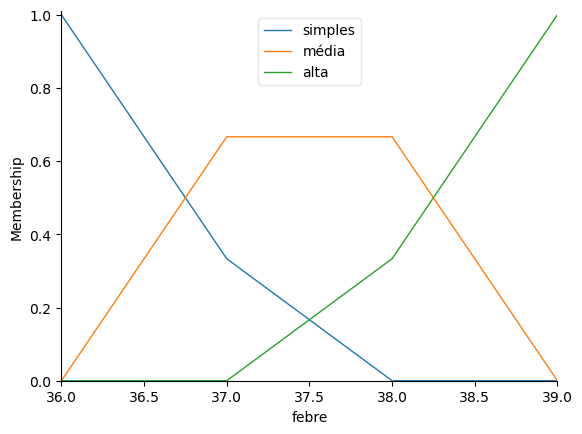

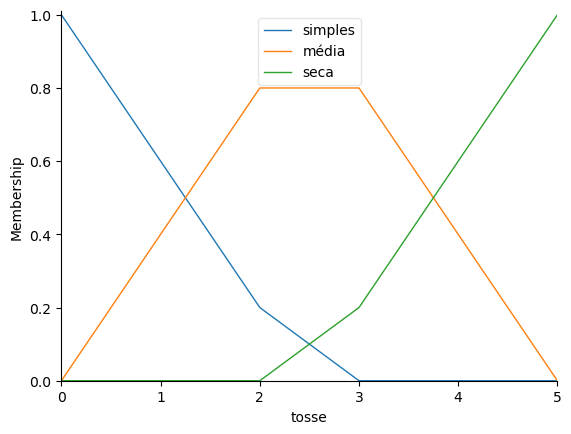

In [16]:
febre.view()
tosse.view()

## Definindo regras

In [9]:
regra1 = ctrl.Rule(tosse['simples'] & febre['simples'], doenca['resfriado_normal'])
regra2 = ctrl.Rule(tosse['simples'] & febre['média'], doenca['resfriado_normal'])
regra3 = ctrl.Rule(tosse['média'] & febre['simples'], doenca['resfriado_normal'])

regra4 = ctrl.Rule(tosse['média'] & febre['média'], doenca['resfriado_severo'])
regra5 = ctrl.Rule(tosse['média'] & febre['alta'], doenca['resfriado_severo'])
regra6 = ctrl.Rule(tosse['simples'] & febre['alta'], doenca['resfriado_severo'])

regra7 = ctrl.Rule(tosse['seca'] & febre['alta'], doenca['covid'])
regra8 = ctrl.Rule(tosse['seca'] & febre['média'], doenca['covid'])
regra9 = ctrl.Rule(tosse['seca'] & febre['simples'], doenca['covid'])

## Criando sistema de controle

In [10]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

## Testando

### Teste 1 (tudo no máximo)



 Diagnóstico baseado na tosse e febre apresentadas (Teste 1): 4.222222222222222  




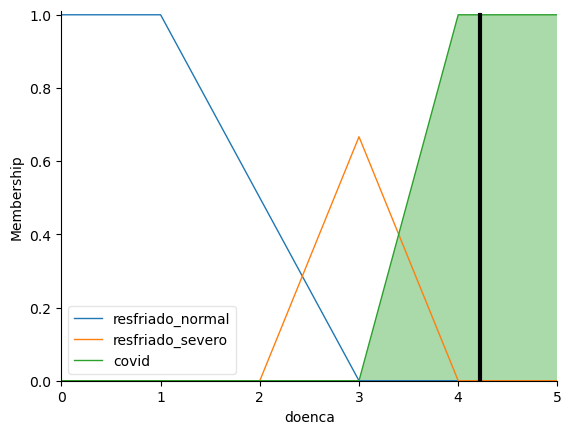

In [11]:
sistema.input['tosse'] = 5
sistema.input['febre'] = 39
sistema.compute()

print("\n\n Diagnóstico baseado na tosse e febre apresentadas (Teste 1):", sistema.output['doenca'], " \n\n")
doenca.view(sim = sistema)

### Teste 2 (tudo no mínimo)



 Diagnóstico baseado na tosse e febre apresentadas (Teste 2): 1.0833333333333333  




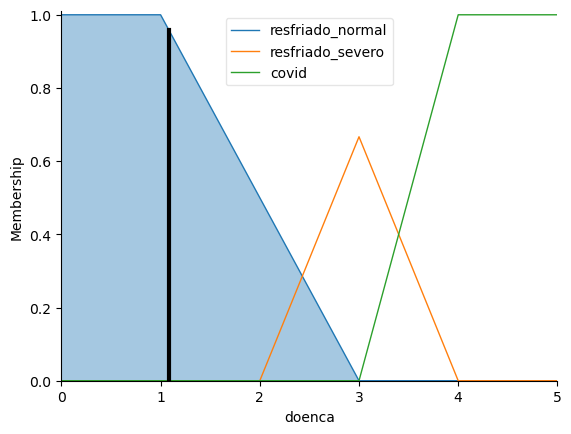

In [12]:
sistema.input['tosse'] = 0
sistema.input['febre'] = 36
sistema.compute()

print("\n\n Diagnóstico baseado na tosse e febre apresentadas (Teste 2):", sistema.output['doenca'], " \n\n")
doenca.view(sim = sistema)

### Teste 3 (tudo no meio)



 Diagnóstico baseado na tosse e febre apresentadas (Teste 3): 2.5598899686359196  




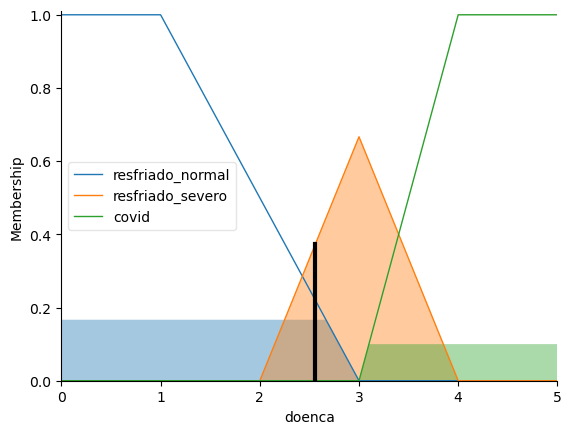

In [13]:
sistema.input['tosse'] = 2.5
sistema.input['febre'] = 37.5
sistema.compute()

print("\n\n Diagnóstico baseado na tosse e febre apresentadas (Teste 3):", sistema.output['doenca'], " \n\n")
doenca.view(sim = sistema)

### Teste 4 (tosse no máximo e febre no mínimo)



 Diagnóstico baseado na tosse e febre apresentadas (Teste 4): 4.222222222222222  




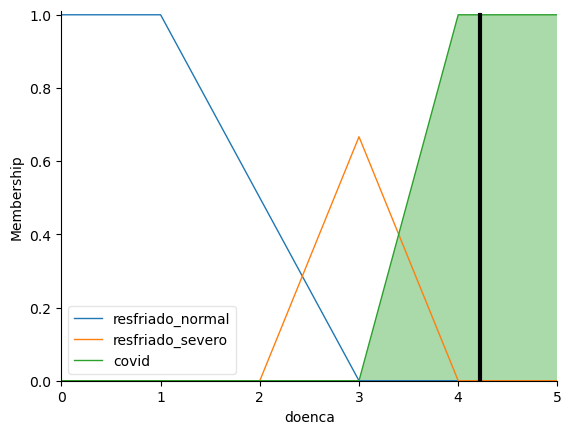

In [14]:
sistema.input['tosse'] = 5
sistema.input['febre'] = 36
sistema.compute()

print("\n\n Diagnóstico baseado na tosse e febre apresentadas (Teste 4):", sistema.output['doenca'], " \n\n")
doenca.view(sim = sistema)

### Teste 4 (tosse no mínimo e febre no máximo)



 Diagnóstico baseado na tosse e febre apresentadas (Teste 5): 3.0  




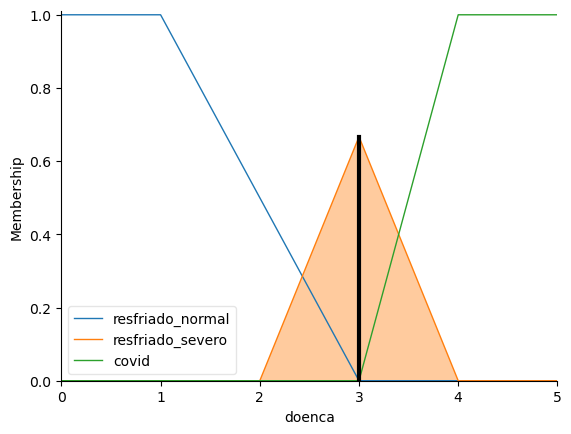

In [15]:
sistema.input['tosse'] = 0
sistema.input['febre'] = 39
sistema.compute()

print("\n\n Diagnóstico baseado na tosse e febre apresentadas (Teste 5):", sistema.output['doenca'], " \n\n")
doenca.view(sim = sistema)